In [1]:
import pandas as pd
from IPython.display import display, HTML
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
csv_file = open("Cities1.csv")
print(csv_file.name)
data = pd.read_csv(csv_file)

Cities1.csv


In [3]:
length_columns = len(data.columns)

In [4]:
length_rows = len(data)

In [5]:
data.shape

(3963, 5)

In [6]:
columns_names = data.columns.values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            3963 non-null   object 
 1   Region          3538 non-null   object 
 2   Country         3963 non-null   object 
 3   AirQuality      3963 non-null   float64
 4   WaterPollution  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


In [8]:
objects_length = len(data.select_dtypes(include=[object]).dtypes)
float_length = len(data.select_dtypes(include=[np.float64]).dtypes)
date_length = len(data.select_dtypes(include=[np.datetime64]).dtypes)
integer_length = len(data.select_dtypes(include=[np.int64]).dtypes)
boolean_length = len(data.select_dtypes(include=[np.bool_]).dtypes)

In [9]:
missing_cells_length = data.isna().sum(axis = 0).sum() 

In [10]:
missing_cells__percentual_length = data.isna().sum(axis = 0).sum() / 100

In [11]:
duplicate_rows_length = len(data)-len(data.drop_duplicates())
duplicate_rows_length

0

In [12]:
duplicate_rows_percentual_length = duplicate_rows_length / 100 
duplicate_rows_percentual_length

0.0

In [13]:
len(data) - data.count()

City                0
Region            425
Country             0
AirQuality          0
WaterPollution      0
dtype: int64

In [14]:
memory_usage_length = round((data.memory_usage(index=True).sum() / 1024), 2)

Qual o nome do arquivo?  heatmap_dataset


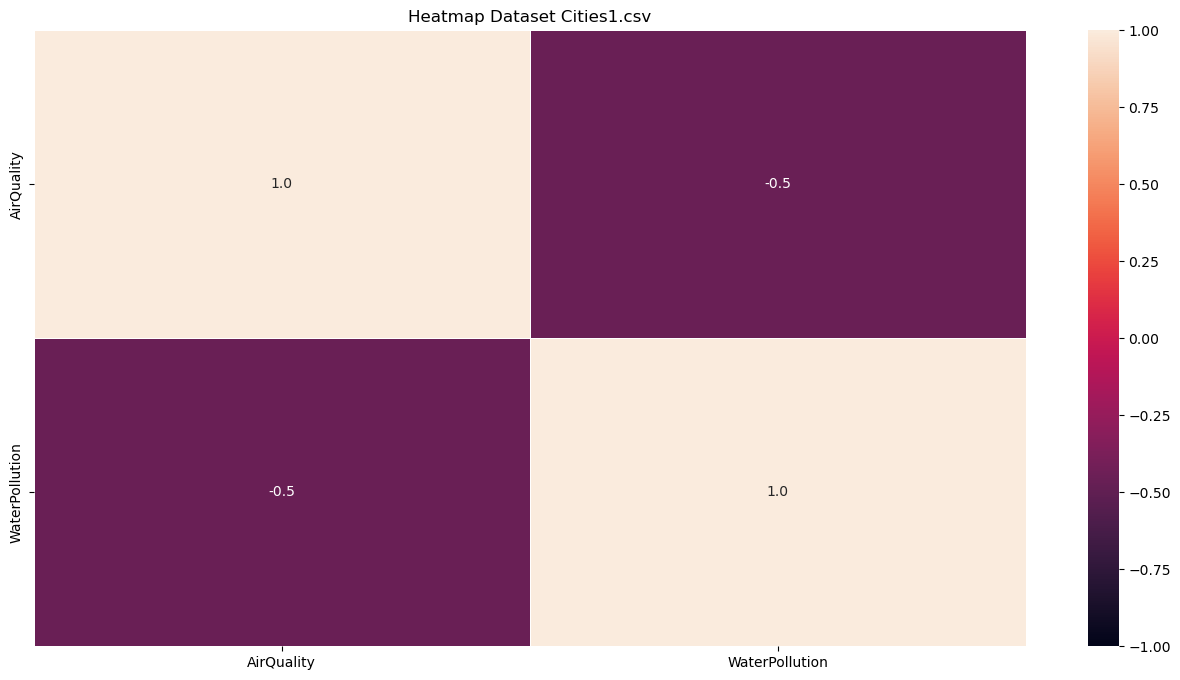

In [15]:
data_numerica = data.select_dtypes(include=[np.float64, np.int64])

correlation_matrix = data_numerica.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidths=.5, vmin=-1, vmax=1)
plt.title(f"Heatmap Dataset {csv_file.name}")

nome_arquivo = input("Qual o nome do arquivo? ")

plt.savefig(f'images/{nome_arquivo}.png')

plt.show()

In [16]:
data_nan = data[data.isna().any(axis=1)]

Qual o nome do arquivo?  missing_variables


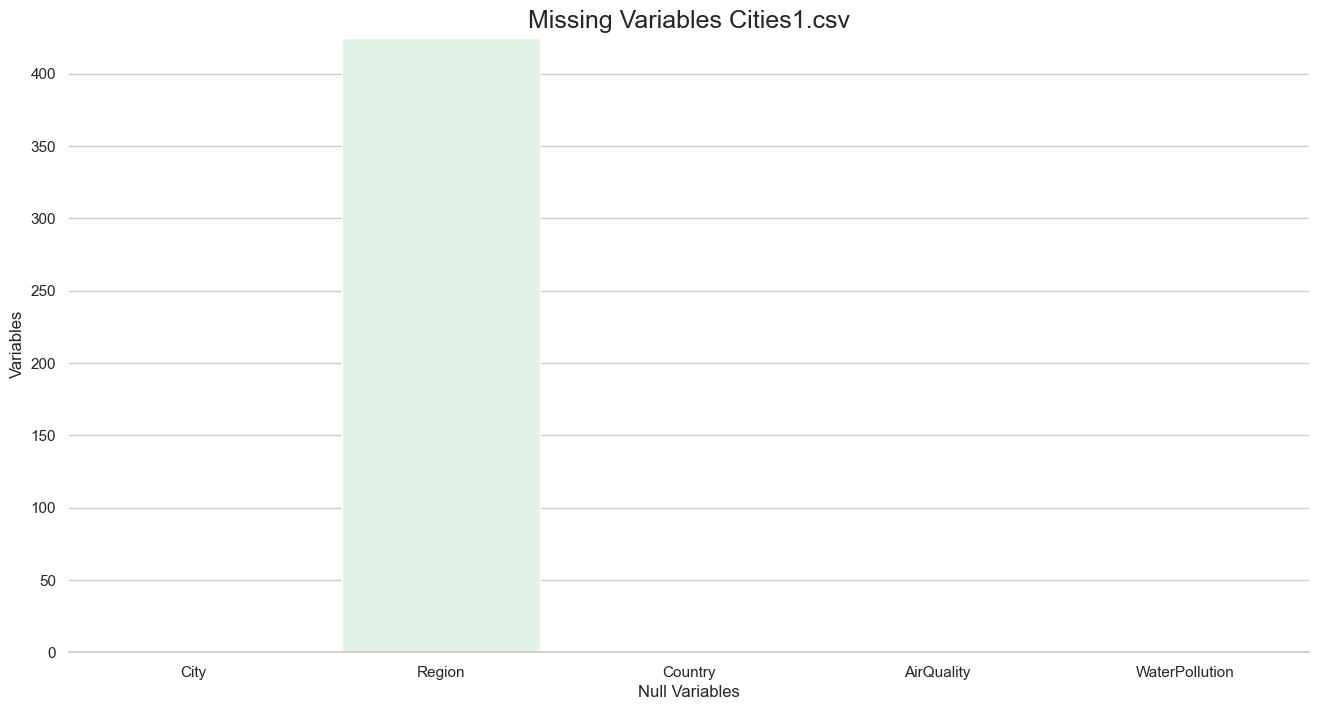

In [17]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(16, 8))

null_counts = data_nan.isnull().sum()

sns.barplot(x=null_counts.index, y=null_counts.values, ax=ax, palette="mako", hue=null_counts, hue_order=null_counts.values, legend=False)

ax.set_title(f"Missing Variables {csv_file.name}", fontsize=18)
ax.set(ylim=(0, null_counts.max() + 1), ylabel="Variables", xlabel="Null Variables")

sns.despine(left=True, right=True)

nome_arquivo_2 = input("Qual o nome do arquivo? ")

plt.savefig(f'images/{nome_arquivo_2}.png')

plt.show()

Qual a coluna que gostaria de analisar?  Region
Qual o nome do arquivo?  scatterplot_matrix


<Figure size 1600x800 with 0 Axes>

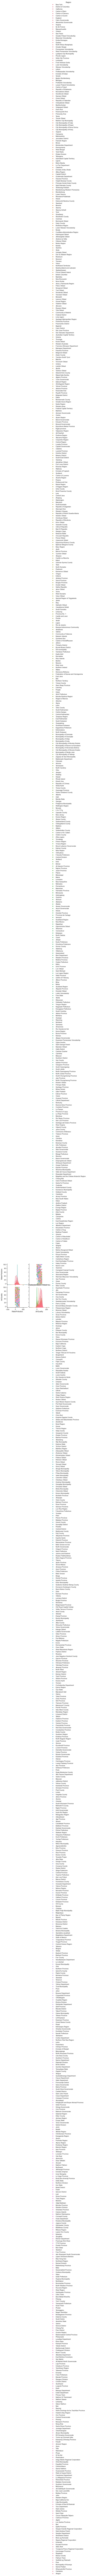

In [18]:
sns.set_theme(style="ticks")
plt.figure(figsize=(16, 8))

data_filtered = data[list(set(data.columns) - set(['load_date', 'target']))]

nome_coluna = input("Qual a coluna que gostaria de analisar? ")

sns.pairplot(data_filtered, hue=nome_coluna)

plt.title(f"Scatterplot Matrix {csv_file.name}")

nome_arquivo_3 = input("Qual o nome do arquivo? ")

plt.savefig(f'images/{nome_arquivo_3}.png')

plt.show()

In [19]:
display(HTML(f'''
<html>
    <link rel='stylesheet' type="text/css" href="custom.css" />
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-QWTKZyjpPEjISv5WaRU9OFeRpok6YctnYmDr5pNlyT2bRjXh0JMhjY6hW+ALEwIH" crossorigin="anonymous">
    <h1 class="title">DataFrame name: {csv_file.name}</h1>    
    <div class="tables">
        <div class="table_one">
            <table class="table table-dark table-hover table-striped">
                <thead>
                    <tr>
                        <th>Dataset Statistics</th>
                        <th>Quantity</th>
                    </tr>
                </thead>
                <tbody>
                    <tr>
                        <td>Number of columns</td>
                        <td>{length_columns}</td>
                    </tr>
                    <tr>
                        <td>Number of rows</td>
                        <td>{length_rows}</td>
                    </tr>
                    <tr>
                        <td>Missing cells</td>
                        <td>{missing_cells_length}</td>
                    </tr>
                    <tr>
                        <td>Missing cells (%)</td>
                        <td>{missing_cells__percentual_length} %</td>
                    </tr>
                    <tr>
                        <td>Duplicate rows</td>
                        <td>{duplicate_rows_length}</td>
                    </tr>
                    <tr>
                        <td>Duplicate rows (%)</td>
                        <td>{duplicate_rows_percentual_length} %</td>
                    </tr>
                    <tr>
                        <td>Total size in memory</td>
                        <td>{memory_usage_length} KiB</td>
                    </tr>
                </tbody>
            </table>
        </div>

        <div class="table_two">
            <table class="table table-dark table-hover table-striped">
                <thead>
                    <tr>
                        <th>Variables Types</th>
                        <th>Quantity</th>
                    </tr>
                </thead>
                <tbody>
                    <tr>
                        <td>Object</td>
                        <td>{objects_length}</td>
                    </tr>
                    <tr>
                        <td>Float</td>
                        <td>{float_length}</td>
                    </tr>
                    <tr>
                        <td>Integer</td>
                        <td>{integer_length}</td>
                    </tr>
                    <tr>
                        <td>Date</td>
                        <td>{date_length}</td>
                    </tr>
                    <tr>
                        <td>Boolean</td>
                        <td>{boolean_length}</td>
                    </tr>
                </tbody>
            </table>
        </div>

        <div class="table_three">
            <table class="table table-striped table-dark table-hover">
                <thead>
                    <tr>
                        <th>Column Index</th>
                        <th>Column Name</th>
                    </tr>
                </thead>
                <tbody>
                    {''.join(f"<tr><td>{i}</td><td>{name}</td></tr>" for i, name in enumerate(columns_names, 1))}
                </tbody>
            </table>
        </div>
    </div>
    
    <ul class="nav nav-tabs mt-5 mb-5" id="myTab" role="tablist">
        <li class="nav-item" role="presentation">
            <button class="nav-link active" id="heatmap-dataset-tab" data-bs-toggle="tab" data-bs-target="#heatmap-dataset-tab-pane" type="button" role="tab" aria-controls="heatmap-dataset-tab-pane" aria-selected="true">Heatmap Dataset</button>
        </li>
        <li class="nav-item" role="presentation">
            <button class="nav-link" id="missing-values-tab" data-bs-toggle="tab" data-bs-target="#missing-values-tab-pane" type="button" role="tab" aria-controls="missing-value-tab-pane" aria-selected="false">Missing Values</button>
        </li>
        <li class="nav-item" role="presentation">
            <button class="nav-link" id="scatterplot-matrix-tab" data-bs-toggle="tab" data-bs-target="#scatterplot-matrix-tab-pane" type="button" role="tab" aria-controls="scatterplot-matrix-tab-pane" aria-selected="false">Missing Values</button>
        </li>
    </ul>
    
    <div class="tab-content" id="myTabContent">
        <div class="tab-pane fade show active" id="heatmap-dataset-tab-pane" role="tabpanel" aria-labelledby="heatmap-dataset-tab" tabindex="0">
            <h2>Heatmap Dataset {csv_file.name}</h2>
            <img src="images/{nome_arquivo}.png" width="1000px" height="600px" />
        </div>
        <div class="tab-pane fade" id="missing-values-tab-pane" role="tabpanel" aria-labelledby="missing-values-tab" tabindex="0">
            <h2>Missing Variables {csv_file.name}</h2>
            <img src="images/{nome_arquivo_2}.png" width="1000px" height="600px" />
        </div>
        <div class="tab-pane fade" id="scatterplot-matrix-tab-pane" role="tabpanel" aria-labelledby="scatterplot-matrix-tab" tabindex="0">
            <h2>Scatterplot Matrix {csv_file.name}</h2>
            <img src="images/{nome_arquivo_3}.png" />
        </div>
    </div>

    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.3.3/dist/js/bootstrap.bundle.min.js" integrity="sha384-YvpcrYf0tY3lHB60NNkmXc5s9fDVZLESaAA55NDzOxhy9GkcIdslK1eN7N6jIeHz" crossorigin="anonymous"></script>
</html>
'''))

Dataset Statistics,Quantity
Number of columns,5
Number of rows,3963
Missing cells,425
Missing cells (%),4.25 %
Duplicate rows,0
Duplicate rows (%),0.0 %
Total size in memory,154.93 KiB
Variables Types,Quantity
Object,3
Float,2
